# DATA IMPORT

A data frame with 10,000 observations on the following 55 variables

The Dataset has information about the loans, type of applicants, debit and credit lines and other details of the applicant who has taken a loan. From the data we can say that the loan is mostly taken Debt_consolidation and least taken for the reson of renewable energy. The loan status of most of the applicants is current or fully paid. Cash is the method used by most of the applicants for loan disbursement.

Data issues: 

1. We have no information about the joint account holders in order to compare with the individual account holder. The information provided in the dataset has more than 95% of the data filled with null values for the joint account holders. 

2. Few variables that can actually be important while predicting the data are more biased for a single type. Which means there is more data for a particular type. For example : More than 9000 applicants have loan status in current state, So it is hard to come to conclusions using the variable.

3. Data has domain specific words, So it is not easy to take a decision on dropping the variables.



In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('loans_full_schema.csv')

# DATA CLEANING :

Of all the 55 variables, Emp_Title ( JobTitle), month in which the loan is issued, state, grade and subgrade of the loan, months since last credit inquiry seemed to be of less importance in the data so I have dropped them.

We find that in the columns annual_income_joint, verification_income_joint ,debt_to_income_joint more than 95% of the data is missing. All the three columns are pertaining to the joint account. Keeping them and replacing the null values will not give much information about the joint accounts. So I have dropped all the three of them.

The column delinq_2y gives the information of delinquency to us about the customer or applicant, The months_since_last_delinq variable is not needed to know more on delinquency since our concentration is on the interest rate and other factors. 

More than 90% of the data in the column : months_since_90d_late is missing, So I have dropped the column from the dataset.

The variable- Number of current accounts that are 120 days past due has only a single value 0 which doesnot contribute much to the analysis. So I have dropped it.

We can find that 9948 applicants haven't paid late fees, So it doesnt contribute much on analysis of the data.

Almost all the customers have initial listing status as whole. Which means most of the applicants received the loan completly from the lender.So I have dropped this column



In [2]:
df = df.drop('emp_title', axis = 1)
df = df.drop('issue_month', axis = 1)
df = df.drop('state', axis = 1)
df = df.drop('grade', axis = 1)
df = df.drop('sub_grade', axis = 1)
df = df.drop('annual_income_joint', axis = 1)
df = df.drop('verification_income_joint', axis = 1)
df = df.drop('debt_to_income_joint', axis = 1)
df = df.drop('months_since_last_delinq', axis = 1)
df = df.drop('months_since_90d_late', axis = 1)
df = df.drop('months_since_last_credit_inquiry', axis = 1)
df = df.drop('num_accounts_120d_past_due', axis = 1)
df = df.drop('paid_late_fees', axis = 1)
df = df.drop('initial_listing_status', axis = 1)
df = df.drop('loan_purpose', axis = 1)

<AxesSubplot:>

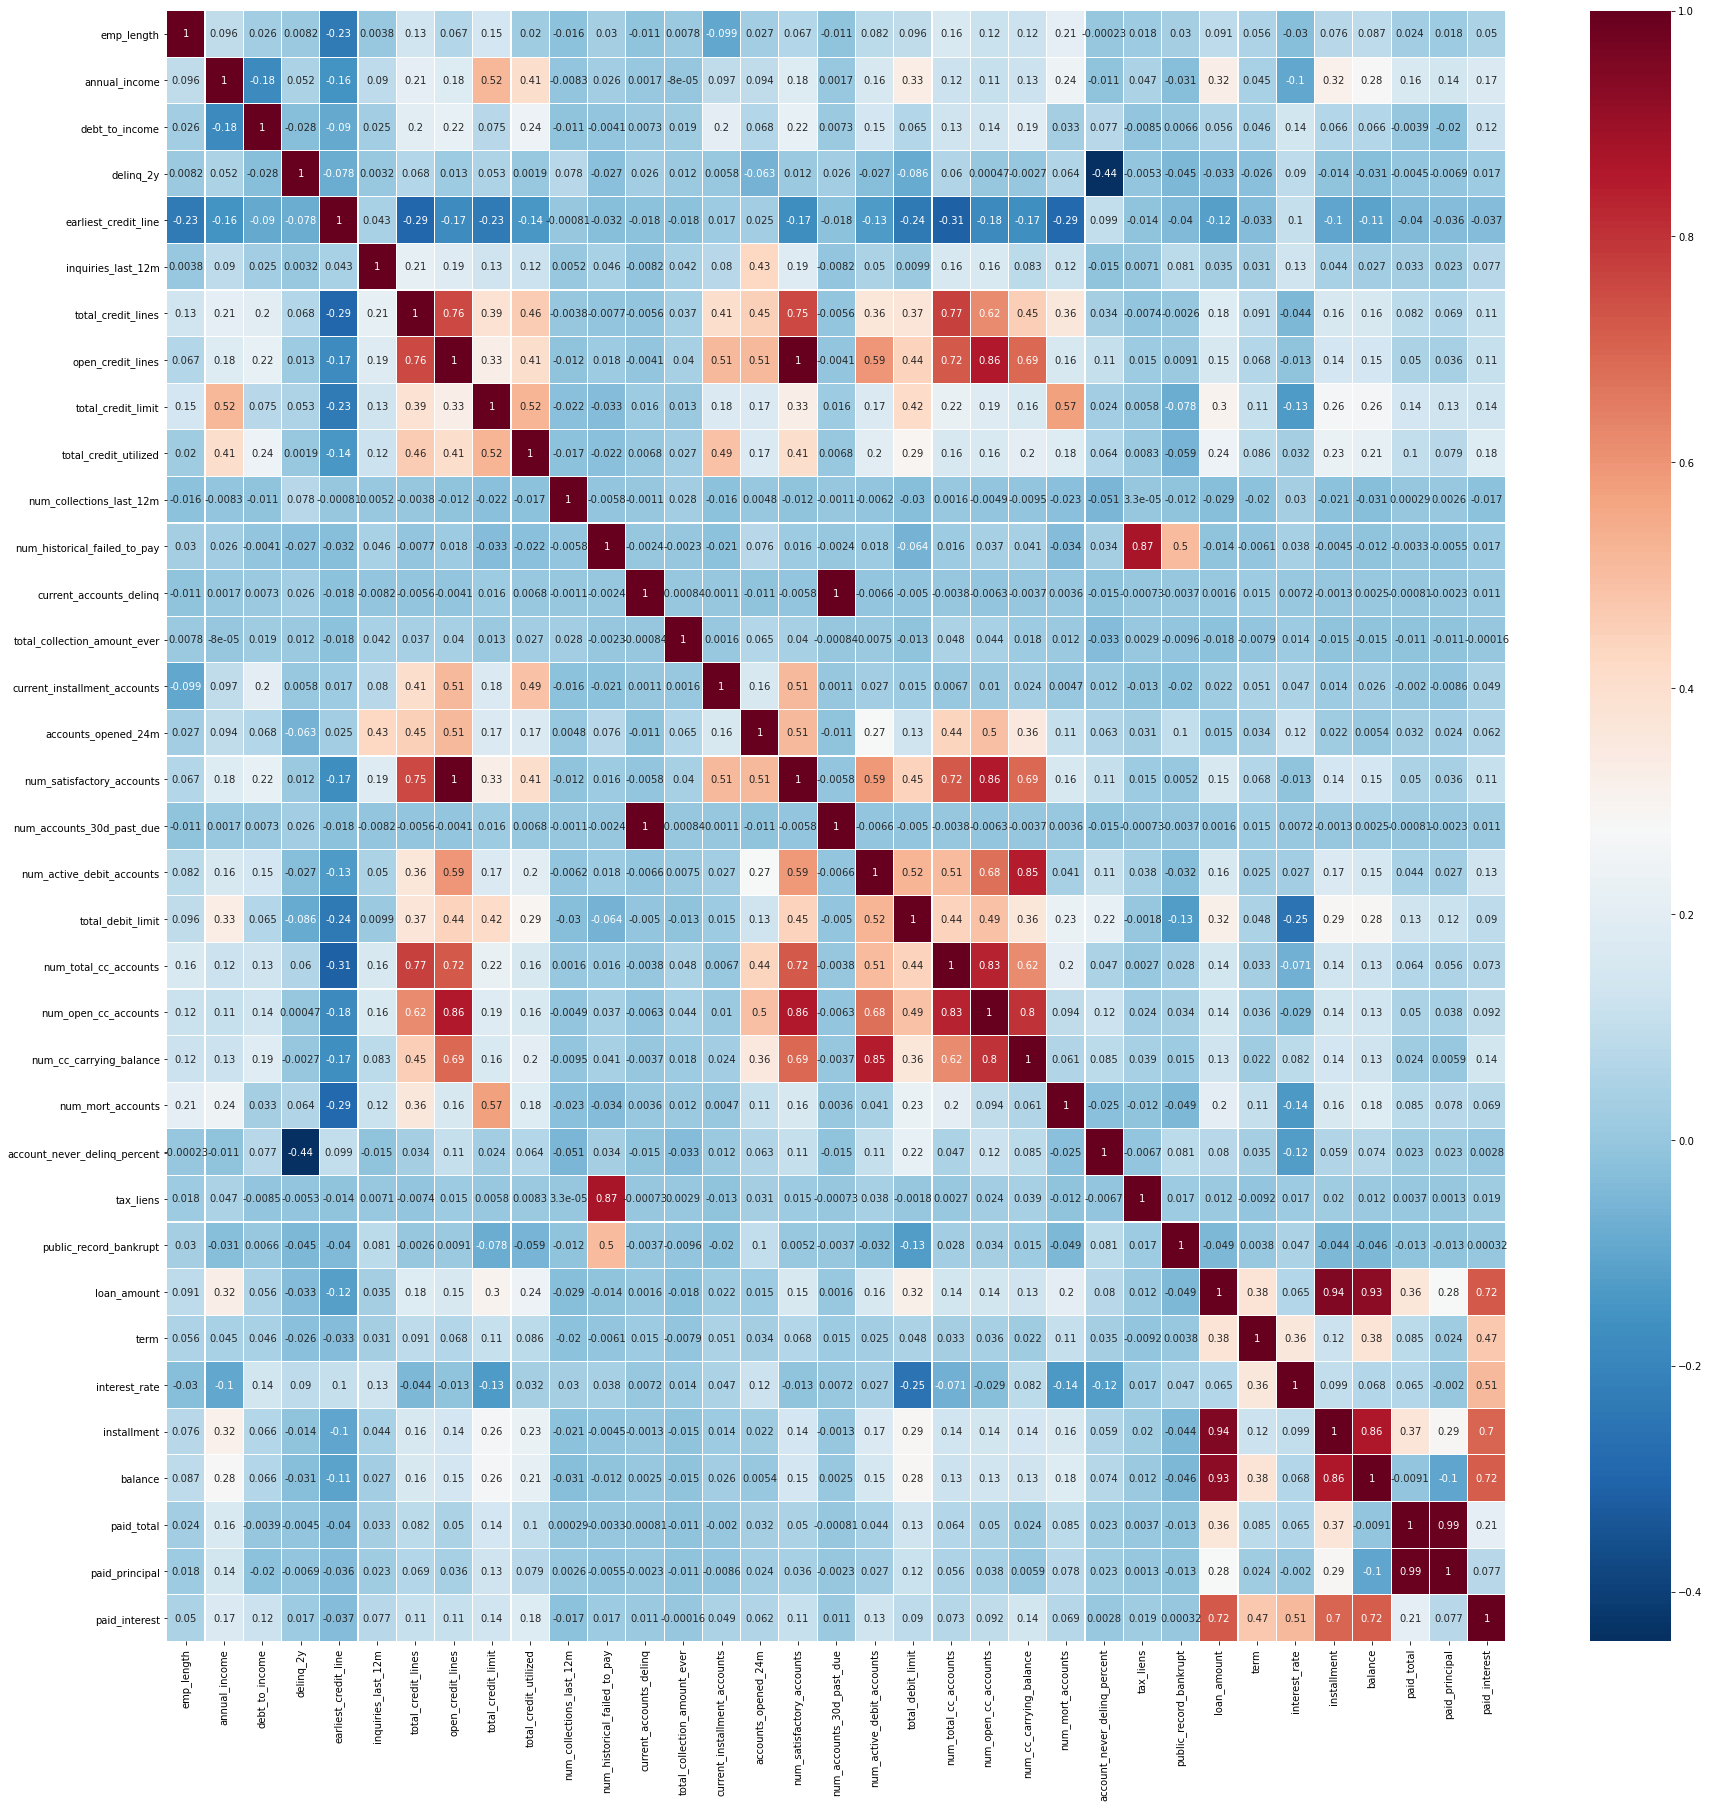

In [3]:
# Correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_corr, annot=True,cmap="RdBu_r",linewidths=0.15,ax=ax)

From the correlation plot we can see that the data set contains few highly correlated variables. So one amongst the following can be used for further analysis

Balance & loan amount

Paid total & paid_principal

Balance & Installment

Number of collections in the last 12 months and tax liens 

num_cc_carrying_balance and num_open_cc_accounts are highly correlated.

In [4]:
df = df.drop('balance', axis = 1)
df = df.drop('num_collections_last_12m', axis = 1)
df = df.drop('tax_liens', axis = 1)
df = df.drop('paid_principal', axis = 1)
df = df.drop('num_cc_carrying_balance', axis = 1)
df = df.drop('num_accounts_30d_past_due', axis = 1)


<b> Replacing the null values </b> 
    
Now there are two columns where I have replaced the null values with the mean and mode values of the variable.

In [5]:
df.emp_length  = df.emp_length.replace({np.nan : 10.0}) # Mode of the data 
df.debt_to_income  = df.debt_to_income.replace({np.nan :19.308191659983976 }) # Mean of the data

# DATA TRANSFORMATION :

Convert all the categorical and ordinal data to numeric for further data analysis 

In [6]:
df['homeownership'] = df['homeownership'].map({'MORTGAGE':2, 'RENT':1,'OWN' : 0 }).astype(int)
df['verified_income'] = df['verified_income'].map({'Source Verified':2, 'Not Verified':1,'Verified' : 0 }).astype(int)
df.application_type = df.application_type.replace({'individual': 1,'joint' : 0})
df['loan_status'] = df['loan_status'].map({'Current':5 , 'Fully Paid': 4,'In Grace Period' : 3,'Late (31-120 days)' : 2, 'Late (16-30 days)': 1, 'Charged Off': 0}).astype(int)
df.application_type = df.application_type.replace({ 36:  1, 60 : 0})
df.disbursement_method = df.disbursement_method.replace({ 'Cash':1 ,'DirectPay':0})

Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing

In [7]:
df

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,...,public_record_bankrupt,application_type,loan_amount,term,interest_rate,installment,loan_status,disbursement_method,paid_total,paid_interest
0,3.0,2,90000.0,0,18.01,0,2001,6,28,10,...,0,1,28000,60,14.07,652.53,5,1,1999.33,1015.19
1,10.0,1,40000.0,1,5.04,0,1996,1,30,14,...,1,1,5000,36,12.61,167.54,5,1,499.12,150.49
2,3.0,1,40000.0,2,21.15,0,2006,4,31,10,...,0,1,2000,36,17.09,71.40,5,1,281.80,106.43
3,1.0,1,30000.0,1,10.16,0,2007,0,4,4,...,0,1,21600,36,6.72,664.19,5,1,3312.89,566.15
4,10.0,1,35000.0,0,57.96,0,2008,7,22,16,...,0,0,23000,36,14.07,786.87,5,1,2324.65,754.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,1,108000.0,2,22.28,0,2008,5,44,13,...,1,1,24000,36,7.35,744.90,5,1,2969.80,556.14
9996,8.0,2,121000.0,0,32.38,4,1994,1,28,15,...,0,1,10000,36,19.03,366.72,5,1,1456.31,603.75
9997,10.0,2,67000.0,0,45.26,2,2004,0,18,11,...,0,0,30000,36,23.88,1175.10,5,1,4620.80,2238.45
9998,1.0,2,80000.0,2,11.99,0,1999,1,38,15,...,0,1,24000,36,5.32,722.76,5,1,2873.31,391.43


# DATA VISUALIZATION

Visualization 1: 

<AxesSubplot:xlabel='application_type', ylabel='public_record_bankrupt'>

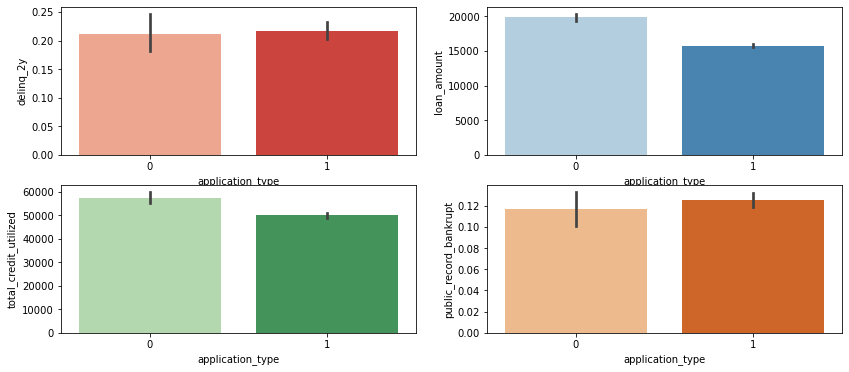

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.barplot(x='application_type',y='delinq_2y',data= df,palette='Reds')
plt.subplot(2,2,2)
sns.barplot(x='application_type',y='loan_amount',data= df,palette='Blues')
plt.subplot(2,2,3)
sns.barplot(x='application_type',y='total_credit_utilized',data= df,palette='Greens')
plt.subplot(2,2,4)
sns.barplot(x='application_type',y='public_record_bankrupt',data= df,palette='Oranges')

The above subplots give the information about the relation between individual and joint application types with delinq_2y,loan_amount,total_credit_utilized,interest_rate. 
We can say that :

Joint application type has more Delinquencies and public recorded bankruptcies.

People with Individual application type have taken more loan_amount and have utilized their credit and also have good background of paying the total amount back.

Hence joint account holders are a higher risk to the indivuals in terms of Delinquencies on lines of credit in the last 2 years and bankruptcies and Individal application holders are more reliable. 

Visualization 2 :

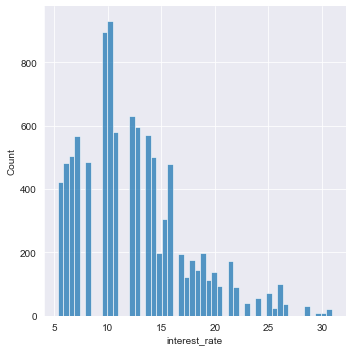

In [9]:
import seaborn as sns
sns.set_style('darkgrid')
sns.displot(df.interest_rate)

We find that in the data most of the applicants received loans around 10% interest rate 

Visualization 3 :

<AxesSubplot:xlabel='loan_status', ylabel='annual_income'>

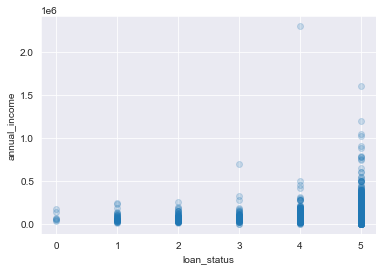

In [10]:
sns.regplot(x = "loan_status", y="annual_income", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

From the above plot we can infer that people with higher annual income tend to be in fully paid or with current loan status.But people with lower annual income tend to be late :  Late (31-120 days)' or  Late (16-30 days). This shows its always safe to give loans to people with better annual income 

Visualization 4 :

C:\Users\saisr\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


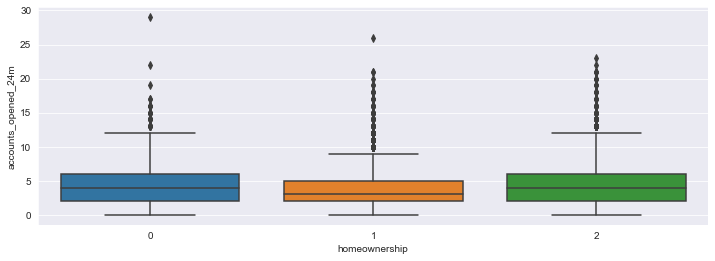

In [11]:
plt.figure(figsize=(12, 4))
x = df.homeownership
y = df.accounts_opened_24m
a = sns.boxplot(x,y)

Home ownership : 0: Own house ; 1: Rent ; 2: Mortgage 
                
People with own house are more probable to take loans, than people with rented houses. 

C:\Users\saisr\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


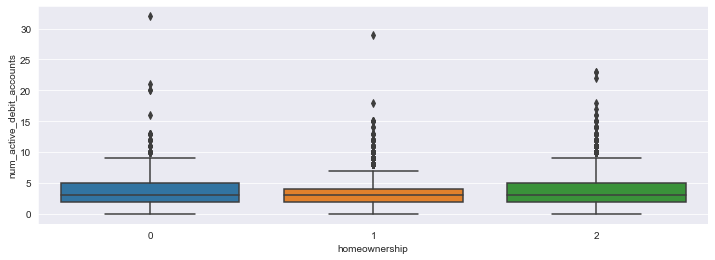

In [12]:
plt.figure(figsize=(12, 4))
x = df.homeownership
y = df.num_active_debit_accounts
a = sns.boxplot(x,y)

People with own houses have higher number of active debit accounts compared to others. From both the above graphs we can infer that even though people with own houses are less in number they have opened more accounts 

Visualization : 5 

<AxesSubplot:xlabel='debt_to_income', ylabel='annual_income'>

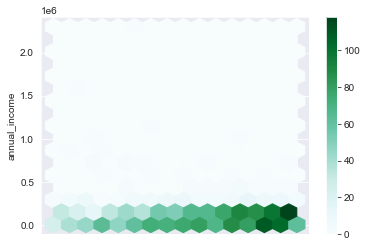

In [13]:
df[df['debt_to_income'] < 10].plot.hexbin(x='debt_to_income', y='annual_income', gridsize=15)


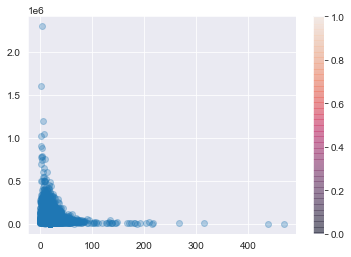

In [14]:
plt.scatter(df.debt_to_income, df.annual_income,  alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

From the point of view of a normal person , Debt to income ratio should be as low as possible. From the above graphs we can see that as the income level increases the debt ratio is low. This can be quite usual because income is in the denominator but we can also state that in the entire data for the high income groups the debt has never exceeded their annual income. For the applicants to come forward for debts they should generally be from the lower annual income group.

Create a feature set and create a model which predicts interest rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data. 

# PREDICTION 

I have used grid search alogorithm using  5 Cross validations to determine the best paramter for both the algorithms : Linear SVM and Decision tree as well. 

The paramter obtained from the grid search is then used to find the training and test score and also the predicted variable y

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df['interest_rate']
X = df.drop('interest_rate', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear SVM -- Regression using a Linear support vector machine 

In [16]:
from sklearn.svm import LinearSVR
li_svc = LinearSVR()
li_svc.fit(X_train,y_train)
print("Train Score : ", li_svc.score(X_train, y_train))
print("Test Score : ", li_svc.score(X_test, y_test))

Train Score :  0.6455902159787669
Test Score :  0.6537639544944354


In [17]:
# Grid search
from sklearn.model_selection import GridSearchCV
param_linear = [{'C': [0.001,0.01,1,10]}]
li_svc = GridSearchCV(estimator=LinearSVR(), param_grid=param_linear, n_jobs=-1,cv=5)
li_svc.fit(X_train, y_train)


C:\Users\saisr\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 1, 10]}])

In [18]:
# Best Cross validation score
print('Best cross validation score:', li_svc.best_score_)
# Best value of the parameter C
print('Best value of the paramter C:',li_svc.best_estimator_.C)

Best cross validation score: 0.65831298614852
Best value of the paramter C: 10


In [19]:
#Model with best parameters
li_svc1 = LinearSVR(C=10)
li_svc1.fit(X_train, y_train)
pred_li_svc1=li_svc1.predict(X_test)
print('Train score: {}'.format(li_svc1.score(X_train, y_train)))
print('Test score: {}'.format(li_svc1.score(X_test,y_test)))

C:\Users\saisr\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train score: 0.6649957038466884
Test score: 0.6676341130153973


In [20]:
y_pred = li_svc1.predict(X_test)


Decision Tree Regressor 

For the decision tree I have just just taken the max_Depth as a hyper parameter and checked the test score using the max depth 2, we find the test score is pretty low.
The best hyper paramter we got from the grid search is the max depth of 9 

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtr_max2 = DecisionTreeRegressor(random_state=0, max_depth=2)
dtr_max2.fit(X_train,y_train)
dtr_max2.score(X_test,y_test)

0.2764743495304114

In [22]:
from sklearn.model_selection import GridSearchCV
param_linear = [{'max_depth': [1,2,3,4,5,6,7,8,9]}]
li_svc = GridSearchCV(estimator= DecisionTreeRegressor(), param_grid = param_linear, n_jobs=-1,cv=5)
li_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}])

In [23]:
# Best Cross validation score
print('Best cross validation score:', li_svc.best_score_)
# Best value of the parameter C
print('Best value of the paramter C:',li_svc.best_estimator_.max_depth)

Best cross validation score: 0.7015331030524256
Best value of the paramter C: 9


In [24]:
dtr_max2 = DecisionTreeRegressor(random_state=0, max_depth=9)
dtr_max2.fit(X_train,y_train)
dtr_max2.score(X_test,y_test)

print('Test Score',dtr_max2.score(X_test,y_test) )
print('Train Score',dtr_max2.score(X_train,y_train) )

Test Score 0.7358479315921591
Train Score 0.8688468987313793


Out of both the algorithms the Decision tree regressor has higher test score, so this model is better suitable to describe the data 

<b> VISUALIZATION OF THE TEST RESULTS : </b> 

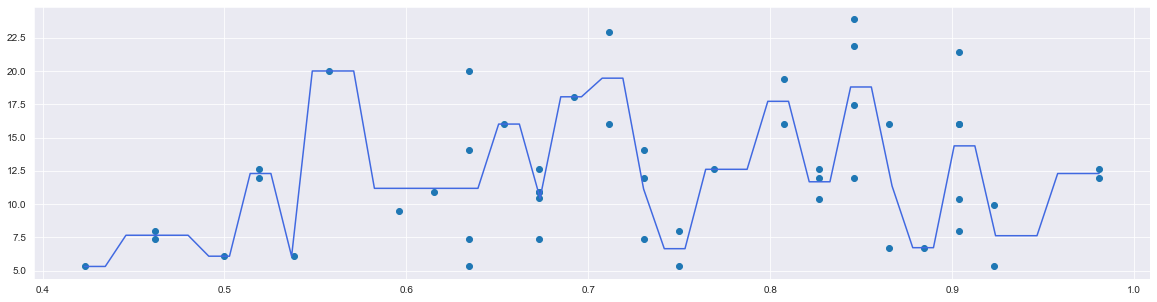

In [26]:
from sklearn.datasets import load_boston
import pandas as pd

X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

clf = DecisionTreeRegressor(max_depth=9)
clf.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = clf.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'royalblue')
plt.scatter(X_b, y_b)

The model is able to predict upto 70 % of the new data

The model prediction is not accurate.With more and more data, It is tending to predict very few datapoints. This is the prediction of interest rate for a particular variable. 



<b> If more time is given, </b>

1. The most important part of any machine learning data project is to understand the data. I would have analysed the distribution of each variable. Having a brief idea of the data distribution will allow us to explore better scaling factors.

2. Grid search algorithm can be used to find out the best hyper parameters, I could have explored many more hyper parameters like max_samples , leaf_nodes ..etc 

3. I was planning to compare the results of the prediction models of SVC with different kernels, KNN Regression and decision tree regressor. Give the time constraint, I was able to properly display the results of SVM and decision tree classifier 






# APPROACH 

I have followed a basic data analytics project approach.

1. I have initially understood the data 
2. Performed the preprocessing steps : data cleaning and data transformation 
3. During implementing the model :

   a) First used the grid search using cross validation inorder to find the best hyper paramater.
   
   b) Trained the model over the best hyper parameters found 
   
   
4. I have selected the model with higher test score and visualised the prediction using a new set of data.


